# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Tushar Jain<br>
Roll Number: 2019101091

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [10]:
import csv
import random
import numpy as np

In [11]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->
Implement Gradient descent with the derivative of MSE for training, and then use the obtained parameter to predict on test points.

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [12]:
# implement Linear Regression
class Linear_Regression:
    def __init__(self, X, y, learnRate = 0.001):
        self.X = []
        for i in range(len(X)):
            self.X.append(np.append(X[i], 1))
        self.y = np.copy(y)
        self.m = np.array([0, 0, 0, 0, 0], dtype = float)
        self.epochs = 10000
        self.learnRate = learnRate

    def predict(self,point):
        final = np.dot(self.m, point)
        return final

    def Gd_step(self):
        gradient = [0,0,0,0,0]
        for i in range(len(self.X)):
            gradient -= (self.y[i] - self.predict(self.X[i]))*self.X[i]
        return gradient/len(self.X)
    
    def GD(self):
        for i in range(self.epochs):
            Db= self.Gd_step()
            self.m = self.m - self.learnRate*Db
    
    def MSE(self):
        MSE = 0
        for i in range(len(self.X)):
            MSE += (self.y[i] - self.predict(self.X[i]))**2
        return MSE/len(self.X)

In [13]:
LR = Linear_Regression(x_train, y_train, learnRate=0.01)
LR.GD()
print("for learnrate = 0.01")
print(LR.MSE())

LR = Linear_Regression(x_train, y_train, learnRate=0.001)
LR.GD()
print("for learnrate = 0.001")
print(LR.MSE())

LR = Linear_Regression(x_train, y_train, learnRate=0.0001)
LR.GD()
print("for learnrate = 0.0001")
print(LR.MSE())

LR = Linear_Regression(x_train, y_train, learnRate=0.005)
LR.GD()
print("for learnrate = 0.005")
print(LR.MSE())

for learnrate = 0.01
0.006228438747471271
for learnrate = 0.001
0.03780571643065648
for learnrate = 0.0001
0.4694431816228928
for learnrate = 0.005
0.0067655379205364815


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

0.03780571643065648


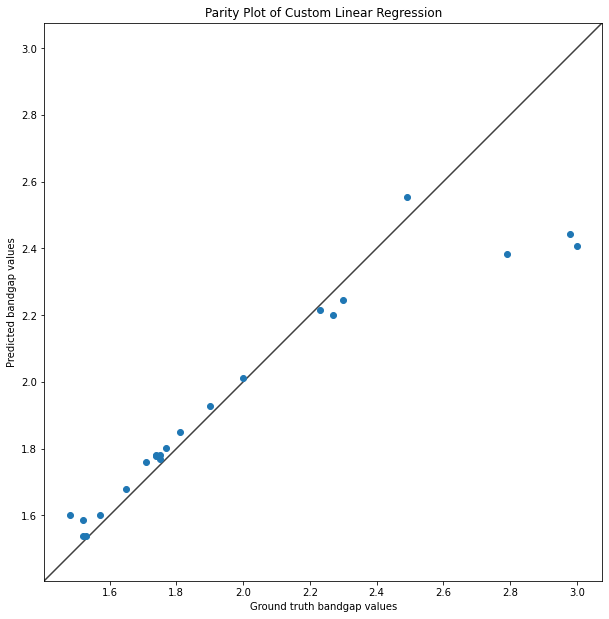

In [14]:
LR = Linear_Regression(x_train, y_train)
LR.GD()
print(LR.MSE())

y_pred = [LR.predict(np.append(i,1)) for i in x_test]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
Ridge Regression is a solution to the low accuracy produced by regression models in the case where the coefficients are highly coorelated. In this, a certain regularization term is added to the MSE and used as the loss function.

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

The L2 norm term in ridge regression is weighted by the regularization parameter alpha. This means that the larger is the alpha, the higher is the smoothness constraint. a lower alpha means higher values for the coefficients. 

Here, you can see that a higher alpha leads to a higher accuracy. This is because a higher alpha makes the model try and only use parameters that are necessary, essentially taking out alot of the noise.

In [15]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
def test_Alpha_R(alpha):
    clf = Ridge(alpha=alpha)
    clf.fit(x_train, y_train)
    MSE = np.sum((y_test - clf.predict(x_test))**2)
    return MSE/len(x_test)
for i in [0,0.01, 0.1, 1]:
    print("for alpha ", i, " MSE is ", test_Alpha_R(i))

for alpha  0  MSE is  0.0031356969006486723
for alpha  0.01  MSE is  0.0031227990661655573
for alpha  0.1  MSE is  0.0031280232631327857
for alpha  1  MSE is  0.010073997446209702


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

This is a linear regression model where a constraint is added that cause the factors for certain features to go to zero. This is done to obtain the subset of predictors that minimizes prediction error.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

Alpha is a term that rewards the shrinkage in lasso regression. That is, the higher the alpha, the higher the incentive for the model to shrink parameters to zero. So, if you choose high alphas, in essence, less paramters will be considered.

Here, you can see that a higher alpha leads to a higher accuracy. This is because a higher alpha makes the model try and only use parameters that are necessary, essentially taking out alot of the noise.

In [16]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
def test_Alpha_L(alpha):
    clf = Lasso(alpha=alpha)
    clf.fit(x_train, y_train)
    MSE = np.sum((y_test - clf.predict(x_test))**2)
    return MSE/len(x_test)
for i in [0,0.01, 0.1, 1]:
    print("for alpha ", i, " MSE is ", test_Alpha_L(i))

for alpha  0  MSE is  0.0031356969006486723
for alpha  0.01  MSE is  0.0062443984513051295
for alpha  0.1  MSE is  0.21138620366010077
for alpha  1  MSE is  0.2161212937940643


/Users/tusharjain/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/tusharjain/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/tusharjain/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.698e-01, tolerance: 1.743e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Rid